# Análisis exploratorio de datos (EDA)

### 1. Importación de Bibliotecas

In [4]:
'''python
Análisis exploratorio de datos.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install sweetviz
import sweetviz as sv

# Añadimos "scipy" para calcular Z-score
from scipy.stats import zscore

### 2. Cargar el dataset

In [6]:

df = pd.read_csv('bank_dataset.csv')


### 3.- Muestra las primeras filas del dataset

In [8]:

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### 4. Información general del dataset

In [10]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


Como se comprueba fácilmente se cuenta con 11.162 registros de datos. Claramente suficientes.
De los campos listados arriba "job", "marital", "education", "default", "housing", "loan", "contact", "month" y "poutcame" son características discretas.
"age", "balance", "day", "duration", "campaign", "pdays", "previous", son características continuas.

Nuestro objetivo, nuestra predicción "diposit" es discreta.

### 5. Descripción estadística del dataset

In [14]:

df.describe()


,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### 6. Histograma de cada variable numérica

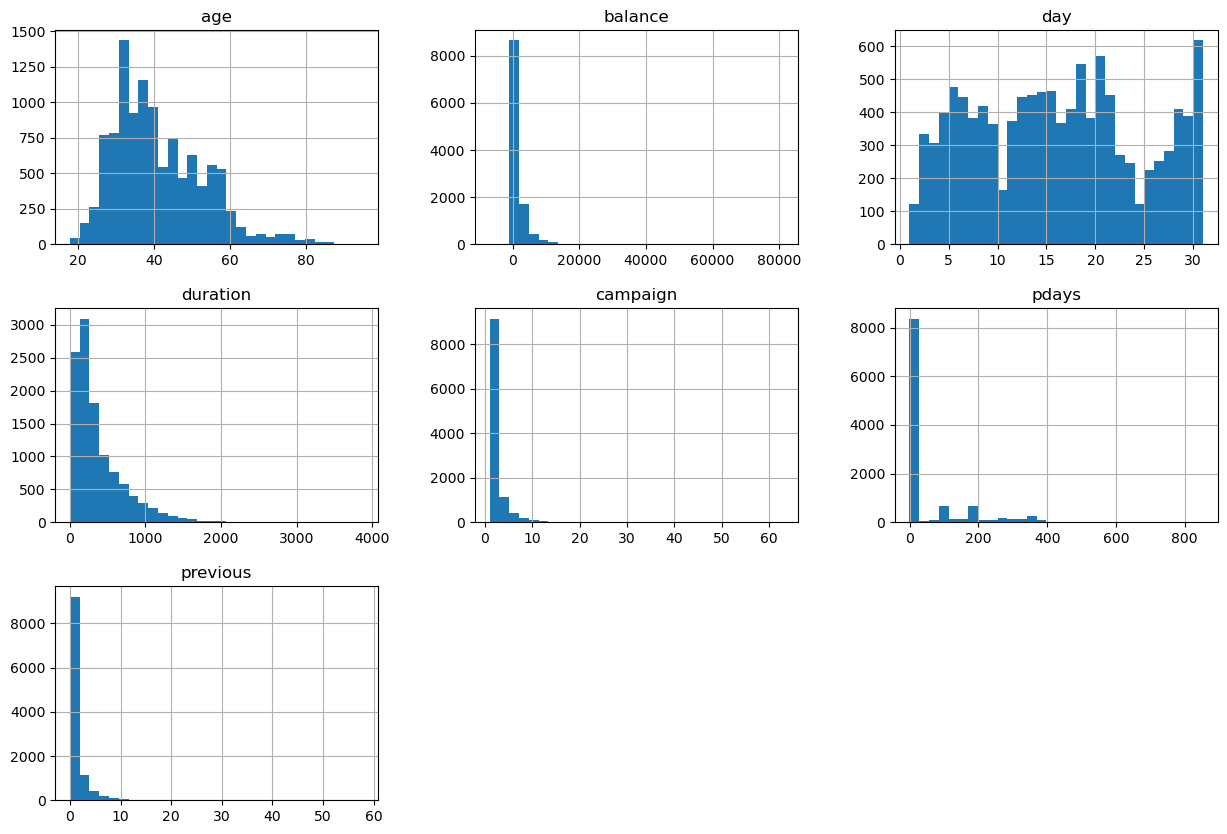

In [16]:

df.hist(bins=30, figsize=(15, 10))
plt.show()


Se comprueba que las distribuciones de las características continuas (menos "day") son asimétricas.

### 7. Contage de los valores de cada variable categórica

In [19]:

for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())


job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### 8. Visualitzación de valores nulos

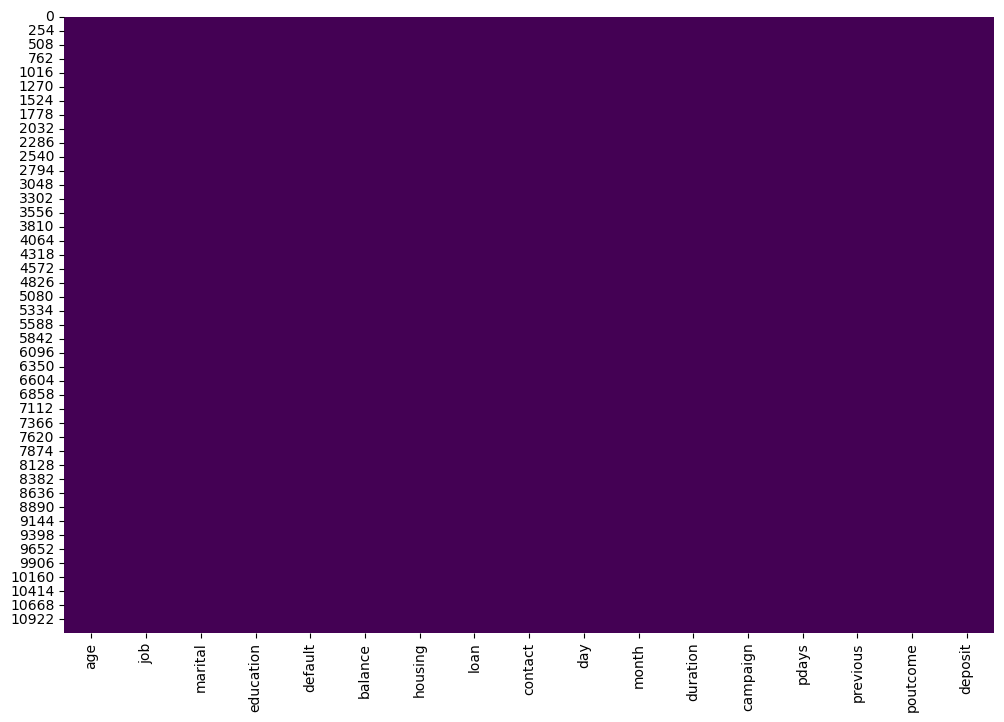

In [21]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


Se encontrarán pocos valores nulos.

### 8. Contar valores nulos por columna

In [24]:

df.isnull().sum()


age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

En efecto, el número de valores nulos se reduce a 10 en "age", 5 en "marital" y 7 en "education".

### 9. EDA automático con "Sweetviz"

In [27]:

report = sv.analyze(df)
report.show_html('EDA_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Si ponemos atención al histograma "poutcome" vemos que el número de "failure" está muy próximo al número de "success", luego habrá poco desequilibrio de clases. Nótese que hay valores de "poutcome" marcados como "other", se considerarán como "failure"

"sweetviz" construye para nosotros una matriz de correlación. Utiliza la correlación de Pearson para los datos continuos
y el "uncertainty coeficient" para los datos discretos.

Claramente la variable más significativa es la duración de la llamada, "duration". Pero este dato no se conocerá "a priori". Esto es, no sabremos lo que durará la llamada sin haber realizado la propia llamada. Por tanto no servirá para hacer predicciones. Deberemos descartarlo.

Después de "duration" las características más relevantes son: "pdays", "previous", "campaign", "balance".

Despues de éstas tenemos otro grupo de menor relevancia: "poutcome", "day", contact y "age".

Introduciremos estas 8 características en nuestro modelo.

Todas las relaciones tomadas son débiles y positivas. Si la característica aumenta de valor, la probabilidad de éxito también.

Los nulos en "marital" y "education" pueden descartarse, porque apenas afectan al resultado. Para el campo "age" se comprobará que su "poutcome" sea "unknown". Si lo es, pueden descartarse. En el annexo 11.1 se listan dichos registros. Solo habrá que considerar un registro.
Dado que se trata de un único registro se anotará un valor igual a la media.

Se tiene una seria de variables continuas no simétricas: "pdays", "previous", "campaign", "balance", "age".
En el anexo 11.2 visualizaremos los outliers con el diagrama de caja. Conservamos los posibles outliers de "age" para evitar sesgos por edad.

"pdays", "previous", "campaign", "balance" son relevantes y se escogen para el modelo. Los outliers con valores altos no deberían descartarse puesto que aumentan la probabilidad de contratar de modo significativo. Eliminarlos podría producir un sesgo en el modelo. En el anexo 10.2 se muestran los diagramas de caja para el valor calculado de "Z-score" de dichos campos.

### 10. Conclusiones

Podemos resumir la exploración de datos en los siguientes puntos:

1. Las distribuciones de los valores continuos son no simétricas.
2. Hay pocos valores nulos y la mayoría pueden descartarse.
3. El campo "duration", aunque relevante, no puede utilizarse para hacer predicciones, puesto que no se dispondrá de dicho dato en el momento de hacer la predicción.
4. Las características más relevantes son: "pdays", "previous", "campaign", "balance".
5. Tenemos otro grupo de menor relevancia: "poutcome", "day", contact y "age".
6. Las 8 anteriores serán las características escogidas en nuestro modelo.
7. Todas las relaciones descubiertas son débiles y positivas.
8. Conservamos los outliers de "age" para evitar sesgos en la edad.
9. Los outliers de "pdays", "previous", "campaign" y "balance" se consideran significativos para el modelo y se mantienen.

### 11. Anexo

#### 11.1. Valores nulos para la edad

In [42]:
# "age" null values. 
null_age = df.loc[df['age'].isnull()]
null_age

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,NaN,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,NaN,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,NaN,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,NaN,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,NaN,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,NaN,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


Como se ve el único registro con un valor diferente de "unknown" es 9751. Pueden descartarse los demás.

#### 11.2. Diagramas de caja para las características continuas

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad7b3bb320>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad702e0e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad70212ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad7010c290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad7010c440>],
 'means': []}

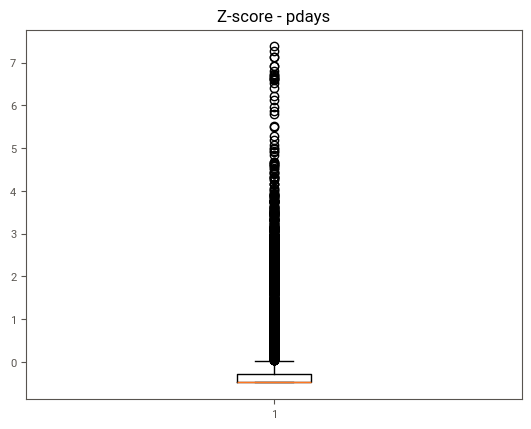

In [45]:

zs_pdays    = zscore (df['pdays'])

plt.title ("Z-score - pdays")
plt.boxplot (zs_pdays)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fad70146ea0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad70147380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad7010fbc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad701478f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad70147c20>],
 'means': []}

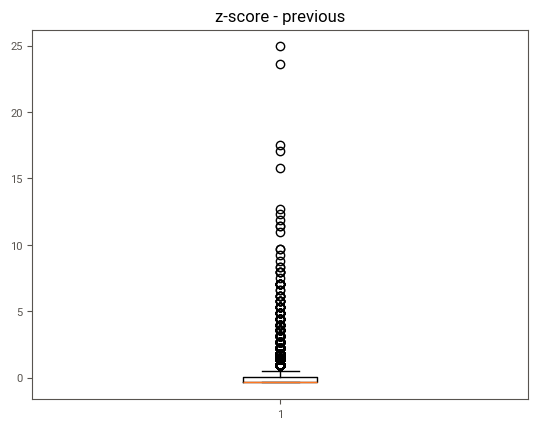

In [46]:
zs_previous = zscore (df['previous'])
plt.title ("z-score - previous")
plt.boxplot (zs_previous)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fad701e1f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad701e2420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad701bdac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad701e2960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad701e2c90>],
 'means': []}

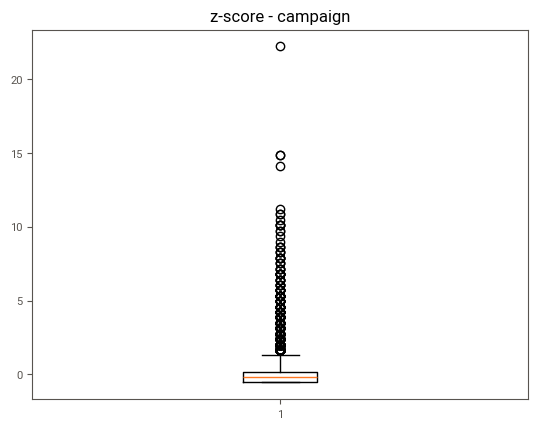

In [47]:

zs_campaign = zscore (df['campaign'])
plt.title ("z-score - campaign")
plt.boxplot (zs_campaign)


{'whiskers': [<matplotlib.lines.Line2D at 0x7fad5b72bcb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fad5b75c230>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fad5b72ba10>],
 'medians': [<matplotlib.lines.Line2D at 0x7fad5b75c7a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fad5b75c9e0>],
 'means': []}

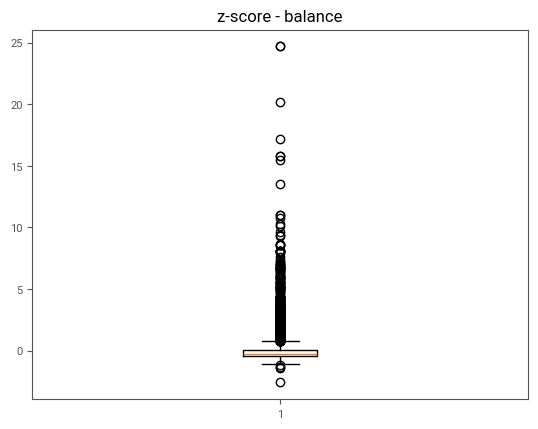

In [48]:

zs_balance  = zscore (df['balance'])
plt.title ("z-score - balance")
plt.boxplot (zs_balance)